# Import

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
from random import randint as ran
#Pour avoir l'auto complétion:
%config IPCompleter.greedy=True  

# Fonction

In [2]:
#Permet de construire notre modèle
def model(X, theta):
    return X.dot(theta)

In [3]:
#notre belle fonction coût
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [4]:
#Fonction de la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [5]:
#Retourne le gradient au point X
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [6]:
#Fonction qui calcule le coefficient de détermination
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

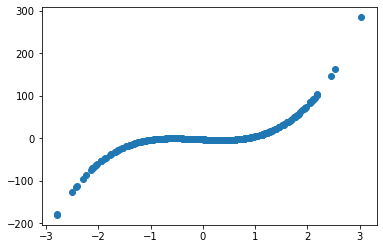

In [7]:
np.random.seed(1) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=500, n_features=1, noise=10)
y=10*x**3+3*x**2-6*x-3

plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

In [8]:
print(x.shape)
print(y.shape)

# redimensionner y car sa taille est incomplète
y = y.reshape(y.shape[0], 1)

print(y.shape)

(500, 1)
(500, 1)
(500, 1)


In [14]:
#X = np.hstack((x, np.ones(x.shape)))#régression linéaire
X = np.hstack((x**3,x**2,x, np.ones(x.shape)))#régression polynomiale
print(X.shape)  #C'est juste que l'on créer le vecteur X de taille m*(n+1)

(500, 4)


In [15]:
np.random.seed(1) # pour produire toujours le meme vecteur theta aléatoire
#theta = np.random.randn(2, 1)#régression linéaire
theta = np.random.randn(4, 1)#régression polynomiale
theta


array([[ 1.62434536],
       [-0.61175641],
       [-0.52817175],
       [-1.07296862]])

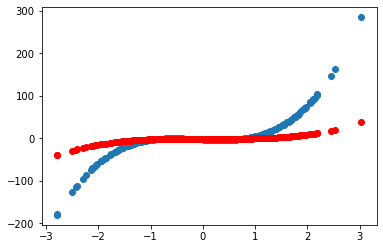

In [16]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

In [17]:
cost_function(X, y, theta)

331.8994680532351

In [22]:
n_iterations = 1000
learning_rate = 0.001


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

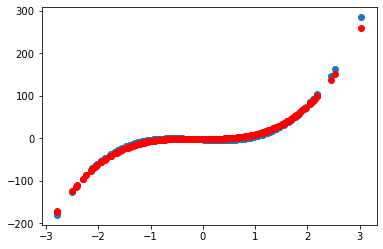

In [26]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

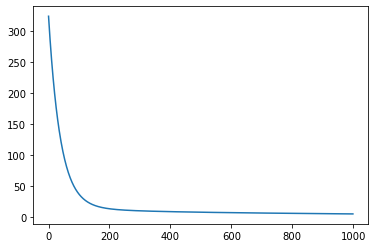

In [27]:
plt.plot(range(n_iterations), cost_history)

In [28]:
coef_determination(y, predictions)

0.9884768597775107

In [29]:
theta_final

array([[ 8.78739807],
       [ 2.08463761],
       [-0.8421324 ],
       [-1.42960491]])

# Analyse polynomiale

In [437]:
#Permet de récupérer le dataset pour une année
def recupData(dataset, nomEntreprise, annee):
    dataset=dataset.dropna(axis=0)
    test=dataset[dataset['Name'] == nomEntreprise]
    return test.loc[annee]['Daily_High'].to_numpy()

In [438]:
data=pd.read_csv('preprocessed_CAC40.csv',index_col='Date',parse_dates=True)

In [439]:
test=recupData(data,'SAFRAN','2010')
#test = test.reshape(test.shape[0], 1)
print(test.shape)

(109,)


In [442]:
y=np.ones(test.shape)
nb=len(y)

for i in range(nb):
    y[i]=i/nb
    

In [443]:
print(y.shape)

(109,)


In [444]:
y

array([0.        , 0.00917431, 0.01834862, 0.02752294, 0.03669725,
       0.04587156, 0.05504587, 0.06422018, 0.0733945 , 0.08256881,
       0.09174312, 0.10091743, 0.11009174, 0.11926606, 0.12844037,
       0.13761468, 0.14678899, 0.1559633 , 0.16513761, 0.17431193,
       0.18348624, 0.19266055, 0.20183486, 0.21100917, 0.22018349,
       0.2293578 , 0.23853211, 0.24770642, 0.25688073, 0.26605505,
       0.27522936, 0.28440367, 0.29357798, 0.30275229, 0.31192661,
       0.32110092, 0.33027523, 0.33944954, 0.34862385, 0.35779817,
       0.36697248, 0.37614679, 0.3853211 , 0.39449541, 0.40366972,
       0.41284404, 0.42201835, 0.43119266, 0.44036697, 0.44954128,
       0.4587156 , 0.46788991, 0.47706422, 0.48623853, 0.49541284,
       0.50458716, 0.51376147, 0.52293578, 0.53211009, 0.5412844 ,
       0.55045872, 0.55963303, 0.56880734, 0.57798165, 0.58715596,
       0.59633028, 0.60550459, 0.6146789 , 0.62385321, 0.63302752,
       0.64220183, 0.65137615, 0.66055046, 0.66972477, 0.67889

In [445]:
x = y.reshape(y.shape[0], 1)
y = test.reshape(test.shape[0], 1)
y=y/100

In [446]:
print(x.shape)
print(y.shape)

(109, 1)
(109, 1)


In [253]:
cost_history


array([242.32247959, 241.66314416, 241.00582722, ...,   1.58938129,
         1.5893804 ,   1.58937952])

In [272]:
X


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [2.32830644e-10, 5.96046448e-08, 1.52587891e-05, 3.90625000e-03,
        1.00000000e+00],
       [3.72529030e-09, 4.76837158e-07, 6.10351562e-05, 7.81250000e-03,
        1.00000000e+00],
       ...,
       [9.53942556e-01, 9.65254128e-01, 9.76699829e-01, 9.88281250e-01,
        1.00000000e+00],
       [9.69114307e-01, 9.76745129e-01, 9.84436035e-01, 9.92187500e-01,
        1.00000000e+00],
       [9.84466315e-01, 9.88326967e-01, 9.92202759e-01, 9.96093750e-01,
        1.00000000e+00]])

In [273]:
theta_final

array([[-2.96141245],
       [-2.98329771],
       [-1.55216838],
       [-2.01699673],
       [22.91228891]])

In [292]:
f=data.drop(['Open','Closing_Price','Volume'], axis=1)

In [293]:
f=f[f['Name'] == 'SAFRAN']


In [302]:
f=f['Daily_High'].to_numpy()

In [304]:
f

array([67.68, 70.56, 76.92, ..., 14.34, 14.57, 14.  ])

In [305]:
f.shape

(2601,)

In [325]:
x

array([[0.00000000e+00],
       [3.84467512e-04],
       [7.68935025e-04],
       ...,
       [9.98846597e-01],
       [9.99231065e-01],
       [9.99615532e-01]])

In [384]:
model(X, theta)

array([[-0.41830152],
       [-0.41560732],
       [-0.41294333],
       [-0.41030937],
       [-0.40770527],
       [-0.40513085],
       [-0.40258592],
       [-0.40007031],
       [-0.39758383],
       [-0.3951263 ],
       [-0.39269755],
       [-0.39029738],
       [-0.38792563],
       [-0.3855821 ],
       [-0.38326662],
       [-0.380979  ],
       [-0.37871905],
       [-0.37648661],
       [-0.37428147],
       [-0.37210346],
       [-0.3699524 ],
       [-0.3678281 ],
       [-0.36573038],
       [-0.36365904],
       [-0.36161391],
       [-0.3595948 ],
       [-0.35760153],
       [-0.3556339 ],
       [-0.35369174],
       [-0.35177485],
       [-0.34988305],
       [-0.34801616],
       [-0.34617397],
       [-0.34435632],
       [-0.342563  ],
       [-0.34079383],
       [-0.33904862],
       [-0.33732719],
       [-0.33562934],
       [-0.33395489],
       [-0.33230364],
       [-0.3306754 ],
       [-0.32906999],
       [-0.32748721],
       [-0.32592688],
       [-0

In [385]:
model(X, theta_final)

array([[0.08561202],
       [0.08837343],
       [0.09110293],
       [0.09380067],
       [0.09646682],
       [0.09910153],
       [0.10170493],
       [0.1042772 ],
       [0.10681848],
       [0.10932892],
       [0.11180867],
       [0.1142579 ],
       [0.11667674],
       [0.11906535],
       [0.12142388],
       [0.12375249],
       [0.12605132],
       [0.12832052],
       [0.13056026],
       [0.13277067],
       [0.13495191],
       [0.13710412],
       [0.13922747],
       [0.14132209],
       [0.14338815],
       [0.14542578],
       [0.14743515],
       [0.14941639],
       [0.15136966],
       [0.15329511],
       [0.15519289],
       [0.15706314],
       [0.15890602],
       [0.16072168],
       [0.16251026],
       [0.16427191],
       [0.16600678],
       [0.16771502],
       [0.16939678],
       [0.1710522 ],
       [0.17268144],
       [0.17428464],
       [0.17586195],
       [0.17741351],
       [0.17893948],
       [0.18044   ],
       [0.18191522],
       [0.183

In [400]:
predictions

array([[0.55054075],
       [0.54718637],
       [0.54382097],
       [0.54044441],
       [0.53705652],
       [0.53365715],
       [0.53024616],
       [0.52682342],
       [0.52338881],
       [0.51994222],
       [0.51648355],
       [0.5130127 ],
       [0.50952959],
       [0.50603415],
       [0.5025263 ],
       [0.499006  ],
       [0.49547319],
       [0.49192785],
       [0.48836994],
       [0.48479945],
       [0.48121636],
       [0.47762069],
       [0.47401242],
       [0.4703916 ],
       [0.46675824],
       [0.46311238],
       [0.45945407],
       [0.45578337],
       [0.45210034],
       [0.44840505],
       [0.4446976 ],
       [0.44097808],
       [0.43724659],
       [0.43350324],
       [0.42974815],
       [0.42598146],
       [0.42220331],
       [0.41841384],
       [0.41461322],
       [0.41080162],
       [0.40697921],
       [0.40314618],
       [0.39930273],
       [0.39544906],
       [0.3915854 ],
       [0.38771196],
       [0.38382897],
       [0.379